## Import the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load csv file

In [2]:
df_stores = pd.read_csv(filepath_or_buffer='../Data/Adidas_Stores.csv', index_col='Asset ID')

df_stores.head()

df_stores.tail()

df_stores.describe()

df_stores.transpose()


Asset ID,5932,7859,8144,8815,8926,11928,11974,12094,12384,12682,...,86365,86397,86571,86698,86706,86844,86941,87031,87266,87631
Brand,Reebok,Adidas,Reebok,Adidas,Reebok,Adidas,Reebok,Reebok,Adidas,Adidas,...,Adidas,Adidas,Reebok,Adidas,Reebok,Reebok,Adidas,Reebok,Adidas,Adidas
Location,Indonesia,Vietnam,Vietnam,Pakistan,Taiwan,Bangladesh,Japan,Pakistan,Vietnam,Thailand,...,Vietnam,China,China,Vietnam,Vietnam,China,United States,China,India,Turkey
Name,PT Leading Garment Industries,Pouyuen Vietnam Company Limited (PYV),"Kanaan Saigon Co., Ltd (2nd Plant)","Style Textile (Pvt), Ltd.",Wei Lee Knitting MFG. Co Ltd,Youngone (CEPZ) Ltd,Tabata Co Ltd Ibaraki Factory,Kampala Industries (Pvt) Ltd.,Din Sen Vietnam Enterprise Co Ltd,"Thai Eastern Industry Co., Ltd.",...,Far Eastern New Apparel (Vietnam) Ltd,"Shanghai Xinfeng Garment Co., Ltd","OMA Fitness Equipment Co., Ltd. (2018 Site)","Regina Miracle International Vietnam Co., ltd(...","Fashion Garments 2 co., Ltd – Xuan Tay","Jiangsu Huansheng Apparel Co.,Ltd","Riddell Sports Group, Inc.",Jiangsu Dali STT Co Ltd,Camphor Shoes (India) Private Limited Expanded...,ERATEKS Tekstil San Ve Tic.AŞ Fatsa Şube 2
Address 1,JL. Mengger No. 97,D10/89Q National road 1A Tan Tao ward,Binh Ta 1 Hamlet,126/3-Kot Lakhpat Industrial Estate,"NO. 100, Hengche Road,","Plot # 03-16, Sector # 2,",651-2 Industrial-park,Sade Pur Road,"Lot B3, Lot J1, J2, D10/89Q, National Highway ...",42/220 Moo 5 Soi Moobansristhien,...,"D1 Street, Bac Dong Phu Industrial Park",No.66 Lane 257 Zhuting Road Yexie Town Songjia...,"No,93 Tai’an Road South,Yang’e village,Lun Jia...","No.9, East West Road,VSIP Hai Phong Township, ...","Hamlet 1, Xuan Tay Commune, Cam My District, D...","SIHONG ECONOMIC DEVELOPMENT AREA,SHUANGYANG ...",7501 Performance Lane,"No 2 Building, Smart Knitting Industrial Park,...",APIIC Industrial park (Apache SEZ Development)...,Fatsa OSB 101.Sok.No:15/3
Address 2,"Moh. Toha KM 5,6 Bandung",Binh Tan District,Duc Hoa Ha Village,(blank),"Pei Miao Li,",Chittagong Export Processing Zone,(blank),Rahim Pur Khitchian,Binh Tan District,"Petchkasem Road,",...,Tan Phu Town,(blank),Shunde,"Duong Quan Commune, Thuy Nguyen District",(blank),(blank),(blank),(blank),Tada Mandal,(blank)
Address 3,"Pasawahan, Dayeuhkolot",Ho Chi Minh city,(blank),(blank),(blank),(blank),(blank),(blank),(blank),"Raikhing,",...,(blank),(blank),(blank),(blank),(blank),(blank),(blank),(blank),SPSR Nellore District,(blank)
City,Bandung,Thanh pho Ho Chi Minh,Duc Hoa Town,Lahore,"MiaoLi City,",Chittagong,Hitachi-Omiya,Sialkot,Ho Chi Minh City,Sampran,...,Binh Phuoc Province,Shanghai,Foshan,Hai Phong,Cam My District,Suqian,North Ridgeville,Suqian,Tada Mandal,Fatsa
Zip Code,40256,7000,850000,54770,36045,4223,319-2134,51300,70000,73210,...,830000,201608,528311,(blank),810000,(blank),44039,223600,524401,(blank)
Private Tier,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,...,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 1 - Primary,Tier 2 – Subcontractor,Tier 1 - Primary
Province,Jawa Barat,Thanh pho Ho Chi Minh,Long An,Punjab,Taiwan,Chittagong / Chattogram,Ibaraki,Punjab,Thanh pho Ho Chi Minh,Nakhon Pathom,...,(blank),Shanghai Shi,Guangdong,(blank),Dong Nai,(blank),Ohio,Jiangsu,Andhra Pradesh,Ordu


## Find the following

In [3]:
# How many distinct Brands, Locations, Provinces, Asset Types
print("Number of distinct brands:", len(df_stores['Brand'].unique()))
print("Number of distinct locations:", len(df_stores['Location'].unique().tolist()))
print("Number of distinct provinces:", len(df_stores['Province'].unique()))
print("Number of distinct asset types:", len(df_stores['Asset Type'].unique()))

print('===============================')

# What are the names of the distinct Brands and Asset Types
print("Distinct brands:", df_stores['Brand'].unique())
print("Distinct asset types:", df_stores['Asset Type'].unique().tolist())


Number of distinct brands: 2
Number of distinct locations: 59
Number of distinct provinces: 251
Number of distinct asset types: 3
Distinct brands: ['Reebok' 'Adidas']
Distinct asset types: ['Distribution Centre', 'Factory', 'Store']


## Using Filters

In [4]:
# How many stores in China
fltr = (df_stores['Location'] == "China") & (df_stores['Asset Type'] == 'Store')
print ("Number of stores in China: ", df_stores[fltr]['Location'].count())

# How many Factories have more than 500 employees
fltr = (df_stores['Asset Type'] == "Factory") & (df_stores['Employees'] > 1000) 
print ("Number of Factories with more than 500 workers: ", df_stores[fltr]['Location'].count())

# List all Asset Types, Cities and Brands for Assets in United States, Vietnam and China
cols = ['Asset Type', 'Location','City', 'Brand']
fltr = df_stores['Location'].isin(["United States", "Vietnam", "China"]) 
df_stores[fltr][cols]

Number of stores in China:  172
Number of Factories with more than 500 workers:  11


,Asset Type,Location,City,Brand
Asset ID,,,,
7859,Factory,Vietnam,Thanh pho Ho Chi Minh,Adidas
8144,Distribution Centre,Vietnam,Duc Hoa Town,Reebok
12384,Distribution Centre,Vietnam,Ho Chi Minh City,Adidas
13017,Store,China,Zhongshan,Adidas
13599,Store,Vietnam,Ho Chi Minh City,Reebok
...,...,...,...,...
86698,Factory,Vietnam,Hai Phong,Adidas
86706,Distribution Centre,Vietnam,Cam My District,Reebok
86844,Store,China,Suqian,Reebok


In [5]:
fltr = (df_stores['Asset Type'] == "Factory") & (df_stores['Employees'] > 1000) 
x = df_stores[fltr]['Name']
y = df_stores[fltr]['Employees'].sort_values()

x

Asset ID
7859               Pouyuen Vietnam Company Limited (PYV)
11928                              Youngone (CEPZ)  Ltd 
15615            Pou Yuen Vietnam company limited (PVN) 
15777                           Hwa Seung Vina Co., Ltd.
15945                        PT Parkland World Indonesia
24075                   PT Nikomas Gemilang (PCI adidas)
24080                                PT Panarub Industry
36512                       Vinh Long Footwear Co., Ltd.
45959                             Vietnam SAMHO Co., Ltd
49580    Regina Miracle Intimate Apparel (Shenzhen) Ltd.
74143      Regina Miracle International Vietnam Co., ltd
Name: Name, dtype: object

## Produce a Simple Bar Chart

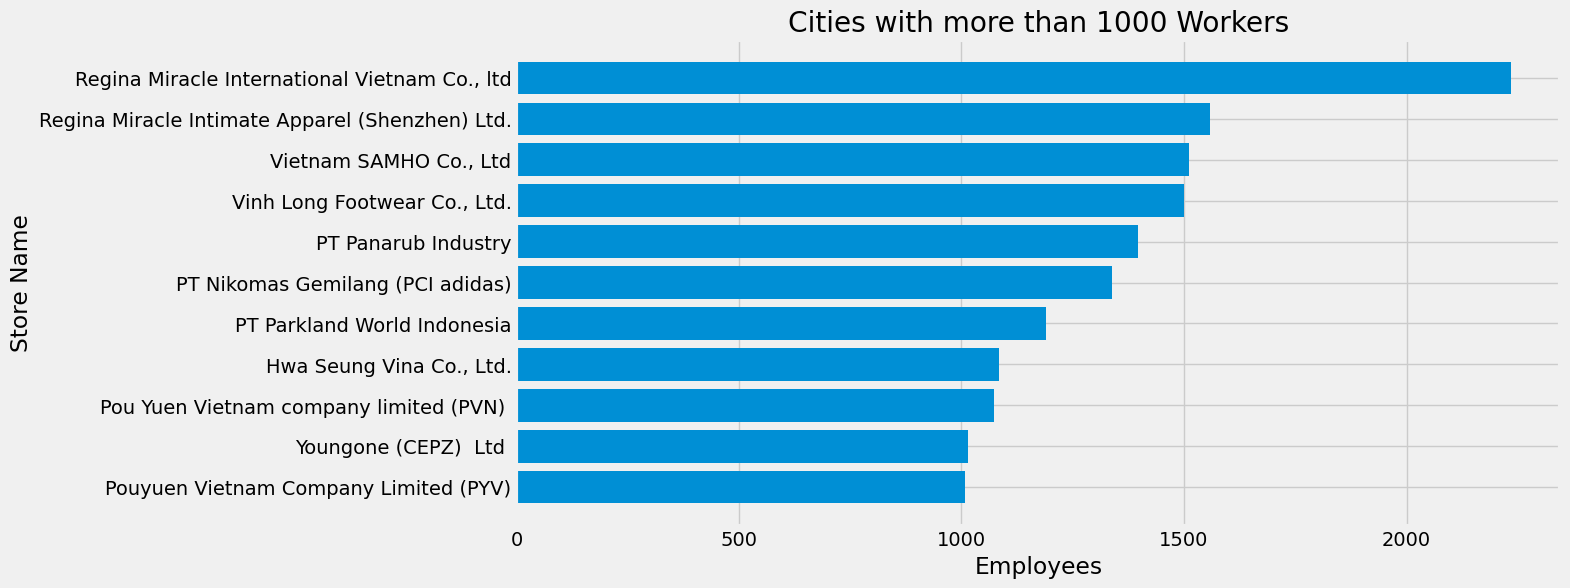

In [6]:
import matplotlib.pyplot as plt

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get the Data
fltr = (df_stores['Asset Type'] == "Factory") & (df_stores['Employees'] > 1000) 
x = df_stores[fltr]['Name']
y = df_stores[fltr]['Employees'].sort_values()

# Set some properties
ax.set_title("Cities with more than 1000 Workers");
ax.set_ylabel("Store Name")
ax.set_xlabel("Employees");

# Produce a bar chart
ax.barh(x, y, align='center')

# Dispplay the Bar Chart
plt.show()

# Save the bar chart
fig.savefig("./Top Factories.jpg",bbox_inches = 'tight')